In [3]:
# Goal: Segment customers based on annual income and spending score using the K-Means clustering algorithm

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [5]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# load the Mall Customers Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# drop CustomerID column
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
# convert categorical data column gender into numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
# basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [10]:
# select relevant features for segmentation
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
# scale features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

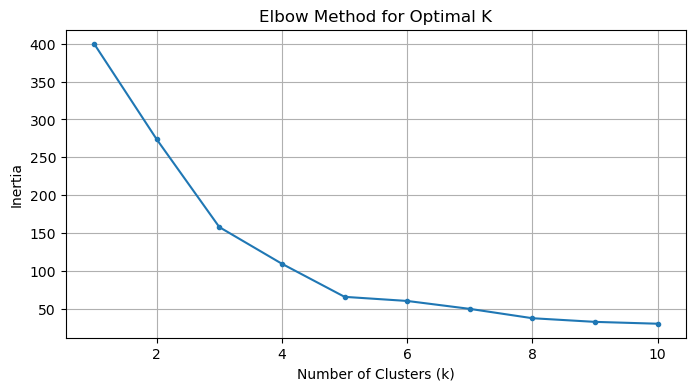

In [10]:
# use elbow method to find optimal number of clusters
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot the elbow curve
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='.')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
# based on elbow curve, choose k=5
km = KMeans(n_clusters=5,random_state=42)
df['Cluster'] = km.fit_predict(X_scaled)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


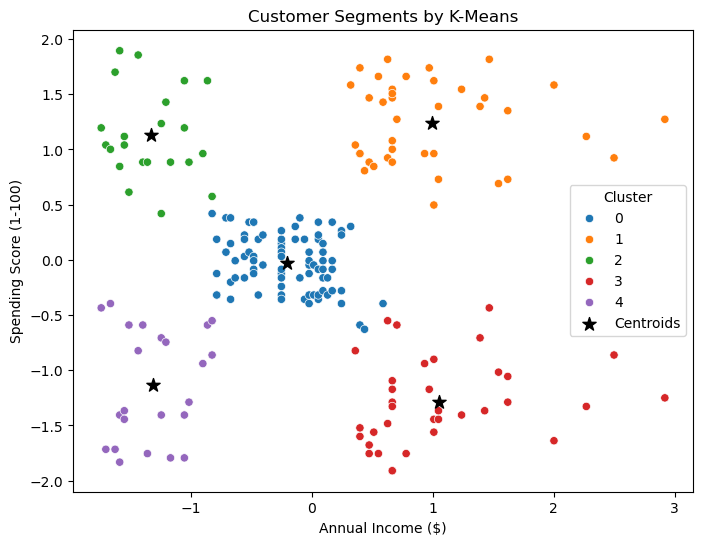

In [13]:
# plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=df['Cluster'],palette='tab10')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black', marker='*', s=100, label='Centroids')
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()